# DATA SCIENCE JOB MARKET ANALYSIS

1. Web Scraping using Selenium

In [4]:
#import necessary packages
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
#create an instance of browser
driver = webdriver.Chrome(executable_path='C:\\Users\\Karan\\Desktop\\chromedriver\\chromedriver.exe')

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}

In [5]:
#iterate over first 30 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills

for i in range(50):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        exp=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.experience").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)

In [6]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [7]:
DS_jobs_df.to_csv("DataScience_jobs.csv")

# 2. Pre-processing


In [8]:
DS_jobs_df=pd.read_csv("DataScience_jobs.csv", index_col=0)
DS_jobs_df.tail(5)

,roles,companies,locations,experience,skills
995,Data Analyst,HealthifyMe,Bengaluru,0-2 Yrs,Customer acquisition\nFrench\nSales\nSQL datab...
996,Sr. Data Analyst,Axim Technologies,"Bengaluru, Karnataka",3-5 Yrs,Business Growth\nData Management\nData Analysi...
997,Analyst - Data Analytics,Repucom,Bengaluru,0-2 Yrs,Analyst\nStatistical modeling\nQuality standar...
998,Analyst - Data Analytics,Repucom,Bengaluru,0-2 Yrs,Statistical modeling\nSAS\nSenior Analyst\nana...
999,Sr. Performance & Data Analyst,Invesco (India) Pvt Ltd,Hyderabad,1-5 Yrs,Data Quality\nExcel\nNumber Crunching\nInvestm...


In [9]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        2
dtype: int64

In [10]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [11]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(107, 5)

In [12]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.skills=[skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
15,senior data scientist,fractal analytics ltd,[bengaluru],4-8 yrs,"[process automation, biometrics, customer anal..."
16,principal data scientist - nlp/voice ai,tvs motor company ltd,[bengaluru],4-8 yrs,"[data science, recommender systems, cnn, rnn, ..."
17,data scientist - image recognition/machine lea...,carbynetech india,[hyderabad],5-10 yrs,"[nlp, data scientist, time series analysis, ar..."
18,data scientist - machine/ deep learning algori...,carbynetech india,[hyderabad],3-8 yrs,"[it skills, python, machine learning, data sci..."
19,lead machine learning engineer/ data scientist,whiz.ai,[pune],10-12 yrs,"[erp, analytical, xml, machine learning, life ..."


# 3. Exploratory Data analysis

3.1. Location wise Data science jobs

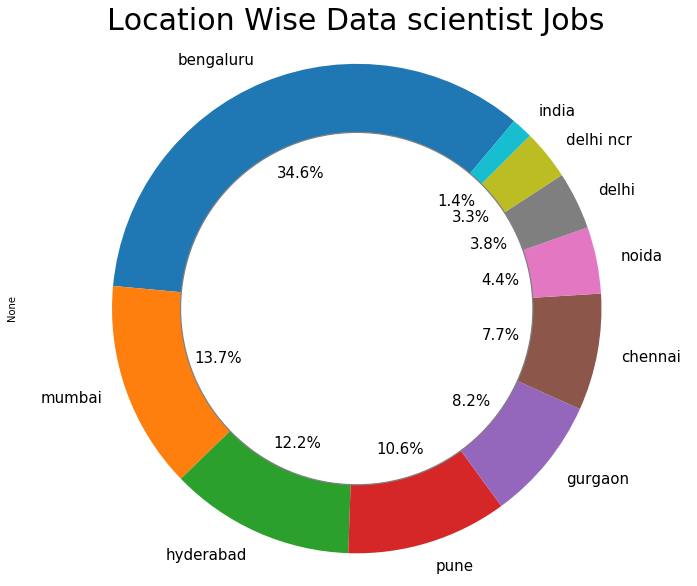

In [13]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

3.2 Companies with more Data science openings

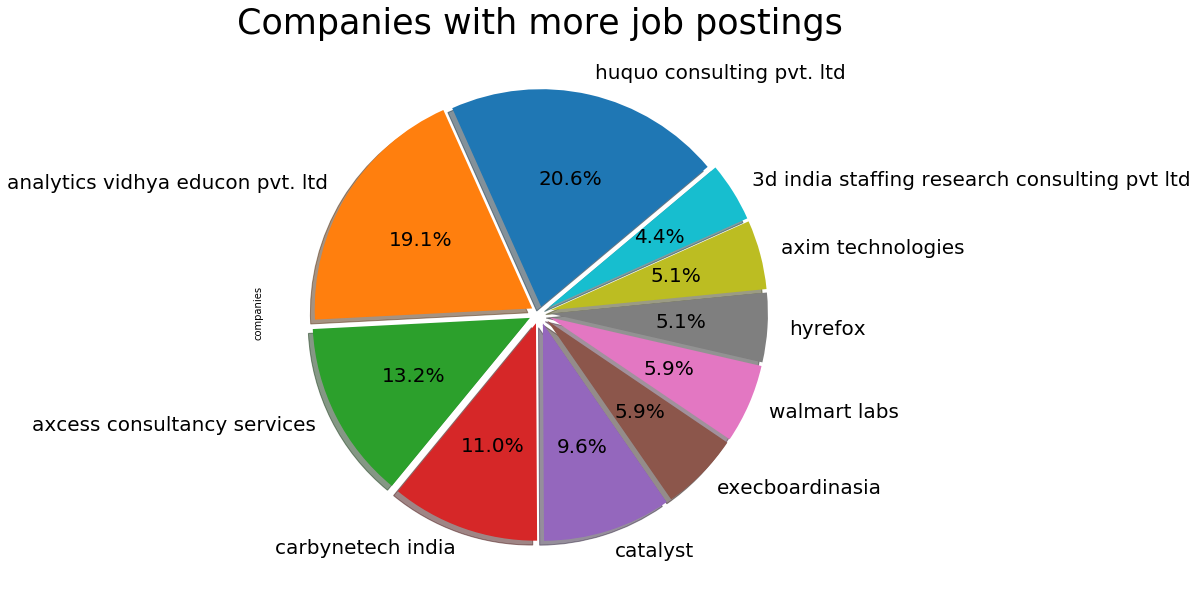

In [15]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

3.3 Data Scientist roles in demand

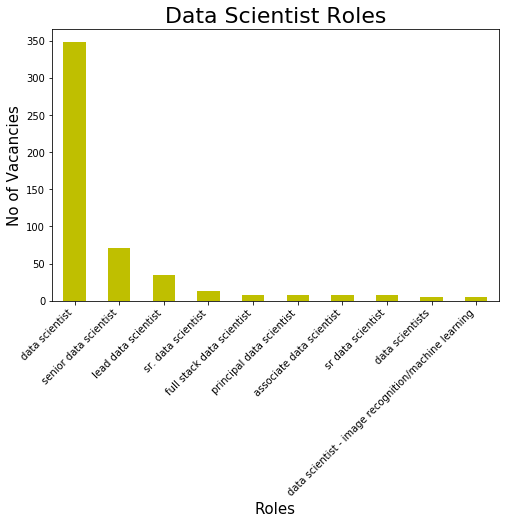

In [16]:
### Roles
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

3.4. Desired Experience for Data science jobs

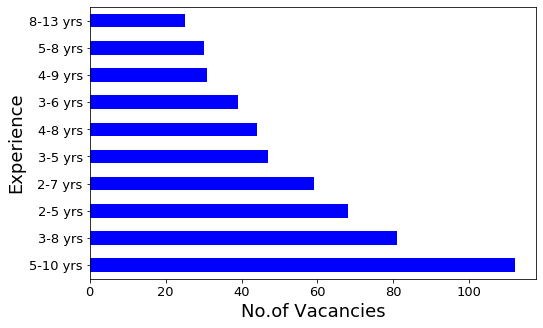

In [17]:
DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

Observations:
There seems to more vacancies for people with a good experience.
Candidates with atleast 2 years of experience have a fair opportunities.

3.5. Skills required for a Data science job

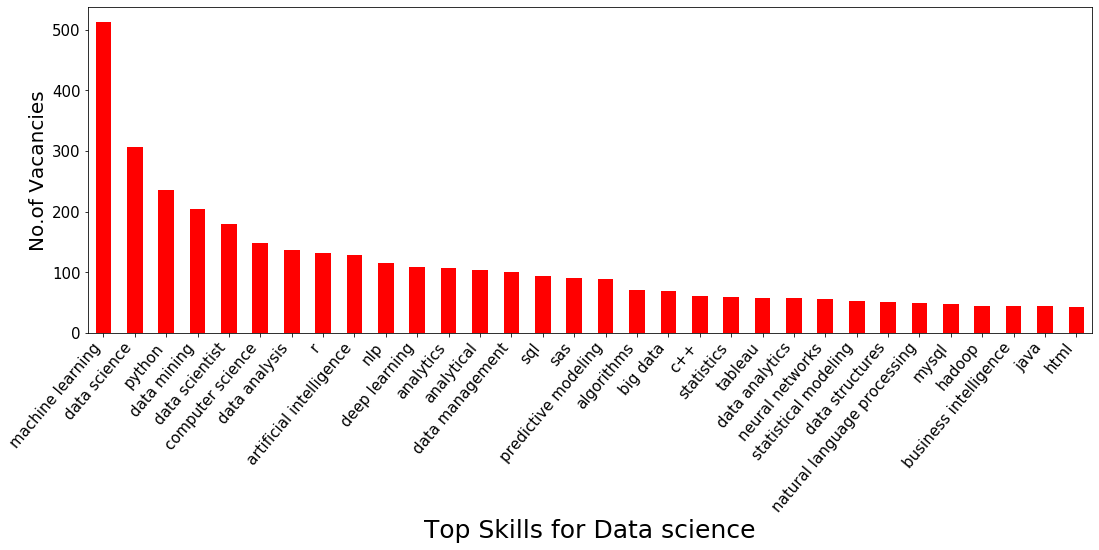

In [18]:
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

Observations:

1.looks clumsy right lets break it down, the reason i included top 30 skills beacuse of the vast fields covered by Data science.

2.we will go one by one sub fields and compare their peers in that to get the better understanding.

In [19]:

#lets convert the skills column into a seperate DataFrame, which makes things easy for preo processing
jj=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head()

,skills,count
0,machine learning,512
1,data science,306
2,python,235
3,data mining,204
4,data scientist,180


# 3.5.1. Must Have Skills

In [20]:
#lets first find the top skills for Data science in general
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': 539,
 'data_mining': 239,
 'data_analysis': 236,
 'statistics': 175,
 'nlp': 172,
 'deep_learning': 111,
 'big_data': 87,
 'computer_vision': 38}

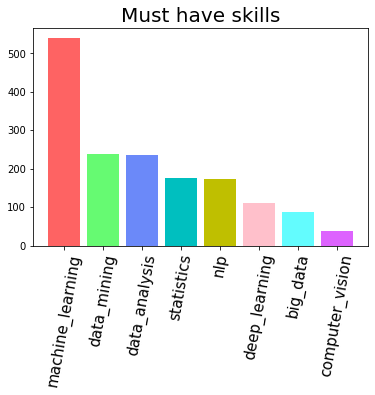

In [21]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

# 3.5.2. Languauges in demand

In [22]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

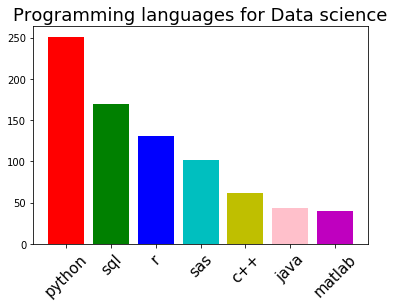

In [23]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

# 3.5.3. Deep learning frameworks

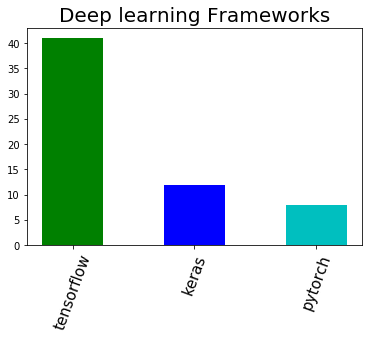

In [25]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()

# 3.5.5. Clouds for Data Science

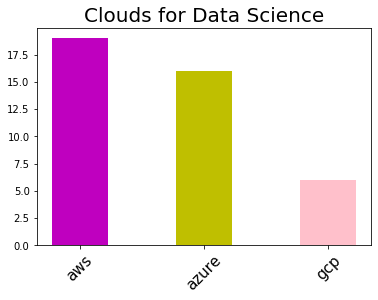

In [26]:
#lets find the skills based on cloud providers
cloud={}
cloud['aws']=jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=jj["count"][jj['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

# 3.5.6. Big data technologies for Data science

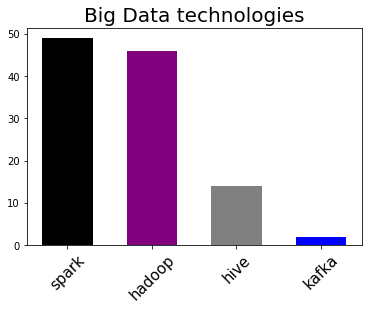

In [27]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()


# 3.5.7. Data Visualization tools

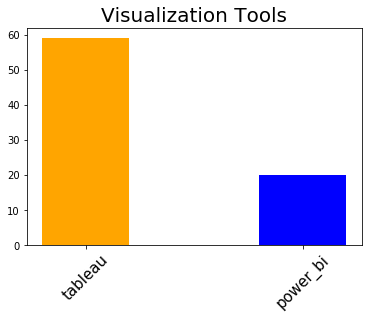

In [28]:
# tools
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()